In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('cardata.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


##### first of all i add age column to the dataset to omit additional columns

In [6]:
data['Year'].max()

2018

In [7]:
data['Age'] = 2019 - data['Year']
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


In [8]:
data.drop(['Car_Name', 'Year'], axis = 1, inplace = True)
data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


##### now it is time to visualizate our data

In [13]:
sns.set_style("darkgrid")

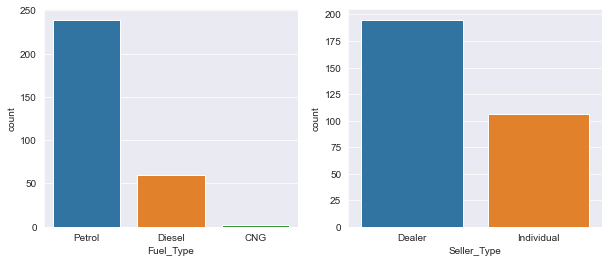

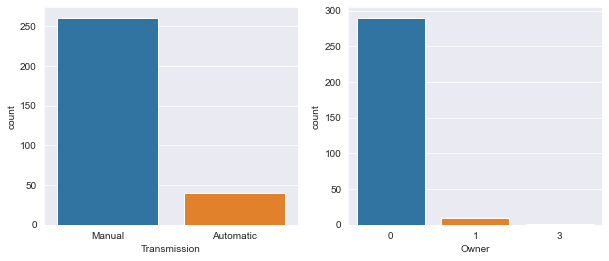

In [14]:
categorical = ['Fuel_Type', 'Seller_Type', 'Transmission','Owner']
i = 0
while i < 4:
    fig = plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(x = categorical[i], data = data)
    i += 1
    plt.subplot(1, 2, 2)
    sns.countplot(x = categorical[i], data = data)
    i += 1

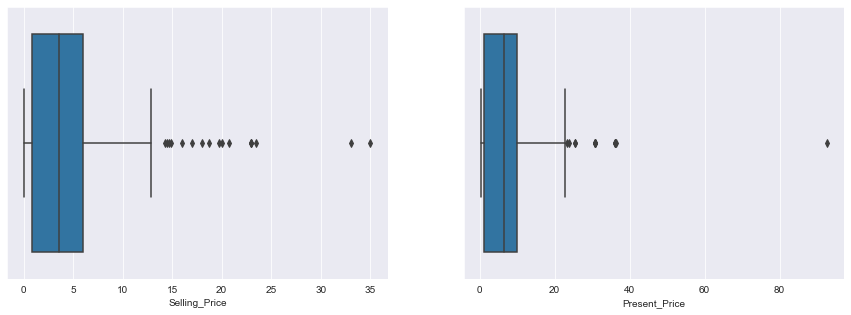

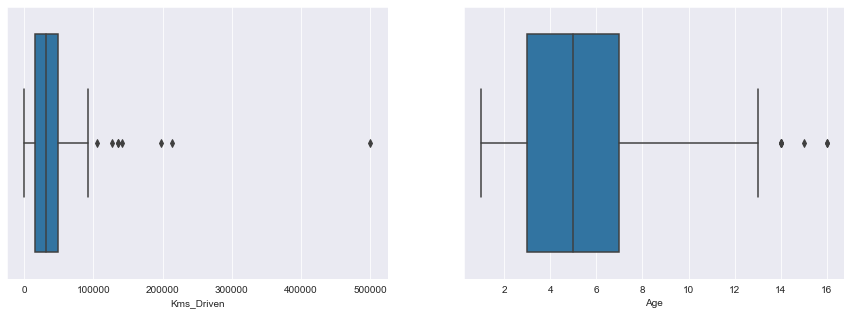

In [15]:
numerical = ['Selling_Price', 'Present_Price', 'Kms_Driven' , 'Age']
i = 0

while i < 4:
    fig = plt.figure(figsize = (15, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x = numerical[i], data = data)
    i += 1
    plt.subplot(1, 2, 2)
    sns.boxplot(x = numerical[i], data = data)
    i += 1
    

In [16]:
data.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,5.372093
std,5.082812,8.644115,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,1.000000
25%,0.900000,1.200000,15000.000000,0.000000,3.000000
50%,3.600000,6.400000,32000.000000,0.000000,5.000000
75%,6.000000,9.900000,48767.000000,0.000000,7.000000
max,35.000000,92.600000,500000.000000,3.000000,16.000000


In [17]:
data.isnull().sum()

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Age              0
dtype: int64

####  now we have to change the categorical collumns to number to start the machine learning progress

In [21]:
print(data['Fuel_Type'].value_counts())
print(data['Seller_Type'].value_counts())
print(data['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [22]:
data['Fuel_Type'].replace({'Petrol': 2, 'Diesel': 3, 'CNG': 4}, inplace = True)
data['Seller_Type'].replace({'Dealer': 2, 'Individual': 3}, inplace = True)
data['Transmission'].replace({'Manual': 2, 'Automatic': 3}, inplace = True)
data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


<AxesSubplot:>

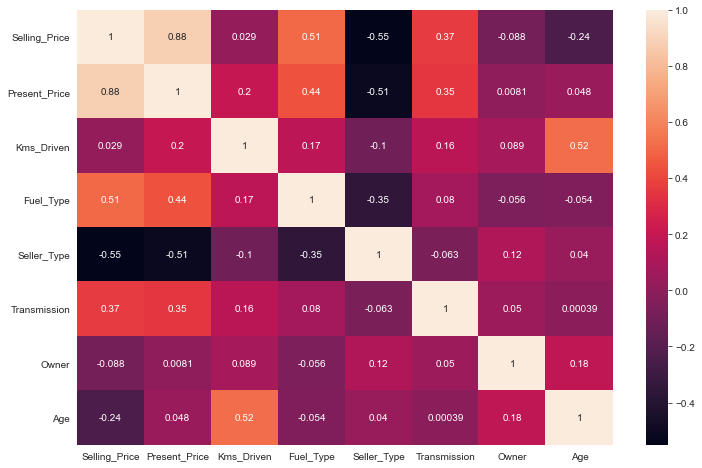

In [38]:
plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(), annot = True, cbar = True)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [26]:
x = pd.DataFrame(data, columns = ['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Age'])
y = data.Selling_Price.values.reshape(-1, 1)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [28]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

In [31]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Absolute Error: ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('R2_score: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  1.0000326012144765
Root Mean Absolute Error:  1.0000163004743854
Mean Squared Error:  2.188556445657222
R2_score:  0.9134181721224691


In [32]:
def check(Dimension, testsize):
    r2 = 0.9134181721224691
    for column in x:
        New_col_name = column + str(Dimension)
        New_col_val = x[column] ** 2
        x.insert(0, New_col_name, New_col_val)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = testsize, random_state = 0)
        New_Model = LinearRegression()
        New_Model.fit(x_train, y_train)
        y_pred = New_Model.predict(x_test)
        r2_new = metrics.r2_score(y_test, y_pred)
        if r2_new < r2:
            x.drop([New_col_name], axis = 1, inplace = True)
        else:
            r2 = r2_new
    print('R2_Score: ', r2)

check(2, 0.2)

R2_Score:  0.9311515369362089


In [33]:
x

,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...
296,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
297,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
298,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
299,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


## we use DotProduct Feature to improve model accuracy

In [39]:
Pres_Kms = x['Present_Price'] * x['Kms_Driven']
Pres_Kms2 = x['Present_Price'] * x['Kms_Driven2']
Pres_Fuel = x['Present_Price'] * x['Fuel_Type']
Pres_Fuel2 = x['Present_Price'] * x['Fuel_Type2']
Pres2_Kms = x['Present_Price2'] * x['Kms_Driven']
Pres2_Kms2 = x['Present_Price2'] * x['Kms_Driven2']
Pres2_Fuel = x['Present_Price2'] * x['Fuel_Type']
Pres2_Fuel2 = x['Present_Price2'] * x['Fuel_Type2']

In [44]:
x.insert(0, 'Pres_Kms', Pres_Kms)
x.insert(0, 'Pres_Kms2', Pres_Kms2)
x.insert(0, 'Pres_Fuel', Pres_Fuel)
x.insert(0,'Pres_Fuel2', Pres_Fuel2)
x.insert(0, 'Pres2_Kms', Pres2_Kms)
x.insert(0, 'Pres2_Kms2', Pres2_Kms2)
x.insert(0, 'Pres2_Fuel ', Pres2_Fuel )
x.insert(0, 'Pres2_Fuel2', Pres2_Fuel2)

In [43]:
x

,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
297,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
298,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
299,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [46]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
r2 = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Absolute Error: ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  0.7263850416722429
Root Mean Absolute Error:  0.8522822546974933
Mean Squared Error:  1.1927142382975893
0.9528148432761344


### we use KFold and cross_val_score to improve our model

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [53]:
k_fold = KFold(n_splits = 5)
result = (cross_val_score(linreg, x, y, cv = k_fold, n_jobs = -1))
print(result)
print(np.mean(result))

[  0.9245566    0.47741516 -23.72936966   0.5859517    0.88655994]
-4.170977252853314


In [54]:
x.shape

(301, 19)

In [55]:
301 /6

50.166666666666664

In [56]:
df = x[x.index < 100]
df2 = x[x.index > 151]
x_new = df.append(df2)
x_new.reset_index(drop = True, inplace = True)
x_new

,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
245,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [57]:
y = data['Selling_Price']
y1 = y[y.index < 100]
y2  = y[y.index > 151]
y_new = y1.append(y2)
y_new.reset_index(drop = True, inplace = True)
y_new.shape

(249,)

In [58]:
x_train,x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.2, random_state = 0)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Absolute Error: ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  0.674805813539484
Root Mean Absolute Error:  0.8214656496406189
Mean Squared Error:  0.8403561528979688
0.9771368037126932


# 0.98 % is enugh to train a data, more than this overfit the data

###### now it is visualization time on train and test data

In [59]:
x_test

,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
248,139.240000,69.620000,1.039263e+09,1.902018e+05,23.600,11.800,1.761462e+08,32237.60,0,4,29855296,34.810000,5.900,5464,2,2,2,0,3
168,78.499600,39.249800,2.907088e+10,7.553232e+05,17.720,8.860,6.562275e+09,170501.84,0,4,1481326144,19.624900,4.430,38488,2,2,2,0,2
76,862.009600,431.004800,1.117164e+12,1.551617e+07,58.720,29.360,7.610112e+10,1056960.00,0,4,5184000000,215.502400,14.680,72000,2,2,2,0,6
150,129.960000,64.980000,2.583735e+10,9.162180e+05,22.800,11.400,4.532868e+09,160740.00,0,4,795240000,32.490000,5.700,28200,2,2,2,0,4
145,1.040400,0.520200,2.832489e+08,8.583300e+03,2.040,1.020,5.553900e+08,16830.00,0,4,1089000000,0.260100,0.510,33000,2,3,2,0,9
73,130.416400,65.208200,6.028498e+10,1.401976e+06,22.840,11.420,1.055779e+10,245530.00,0,4,1849000000,32.604100,5.710,43000,2,2,2,0,8
45,579.846400,289.923200,3.261636e+10,2.174424e+06,48.160,24.080,2.709000e+09,180600.00,0,4,225000000,144.961600,12.040,15000,2,2,3,0,5
159,1968.696900,656.232300,4.145849e+11,9.523024e+06,133.110,44.370,2.803143e+10,643882.65,0,9,1895296225,218.744100,14.790,43535,3,2,2,0,4
218,400.000000,200.000000,4.808174e+11,6.934100e+06,40.000,20.000,4.808174e+10,693410.00,0,4,4808174281,100.000000,10.000,69341,2,2,2,0,8
213,302.760000,151.380000,3.401811e+10,1.604628e+06,34.800,17.400,3.910128e+09,184440.00,0,4,449440000,75.690000,8.700,21200,2,2,2,0,2


In [60]:
x_test.insert(0, 'y_test', y_test)
x_test.insert(0, 'y_pred', y_pred)
x_test

,y_pred,y_test,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,...,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
248,5.048439,5.30,139.240000,69.620000,1.039263e+09,1.902018e+05,23.600,11.800,1.761462e+08,32237.60,...,4,29855296,34.810000,5.900,5464,2,2,2,0,3
168,3.906007,3.50,78.499600,39.249800,2.907088e+10,7.553232e+05,17.720,8.860,6.562275e+09,170501.84,...,4,1481326144,19.624900,4.430,38488,2,2,2,0,2
76,5.338842,5.50,862.009600,431.004800,1.117164e+12,1.551617e+07,58.720,29.360,7.610112e+10,1056960.00,...,4,5184000000,215.502400,14.680,72000,2,2,2,0,6
150,4.209450,4.40,129.960000,64.980000,2.583735e+10,9.162180e+05,22.800,11.400,4.532868e+09,160740.00,...,4,795240000,32.490000,5.700,28200,2,2,2,0,4
145,-0.527112,0.16,1.040400,0.520200,2.832489e+08,8.583300e+03,2.040,1.020,5.553900e+08,16830.00,...,4,1089000000,0.260100,0.510,33000,2,3,2,0,9
73,2.813607,2.65,130.416400,65.208200,6.028498e+10,1.401976e+06,22.840,11.420,1.055779e+10,245530.00,...,4,1849000000,32.604100,5.710,43000,2,2,2,0,8
45,9.412356,7.50,579.846400,289.923200,3.261636e+10,2.174424e+06,48.160,24.080,2.709000e+09,180600.00,...,4,225000000,144.961600,12.040,15000,2,2,3,0,5
159,10.395951,11.75,1968.696900,656.232300,4.145849e+11,9.523024e+06,133.110,44.370,2.803143e+10,643882.65,...,9,1895296225,218.744100,14.790,43535,3,2,2,0,4
218,3.807714,4.10,400.000000,200.000000,4.808174e+11,6.934100e+06,40.000,20.000,4.808174e+10,693410.00,...,4,4808174281,100.000000,10.000,69341,2,2,2,0,8
213,6.978579,6.50,302.760000,151.380000,3.401811e+10,1.604628e+06,34.800,17.400,3.910128e+09,184440.00,...,4,449440000,75.690000,8.700,21200,2,2,2,0,2


In [61]:
NEW_DF = x_test.sort_values(by = 'Present_Price')

In [62]:
a = NEW_DF.Present_Price
b = NEW_DF.y_test
c = NEW_DF.Present_Price
d = NEW_DF.y_pred

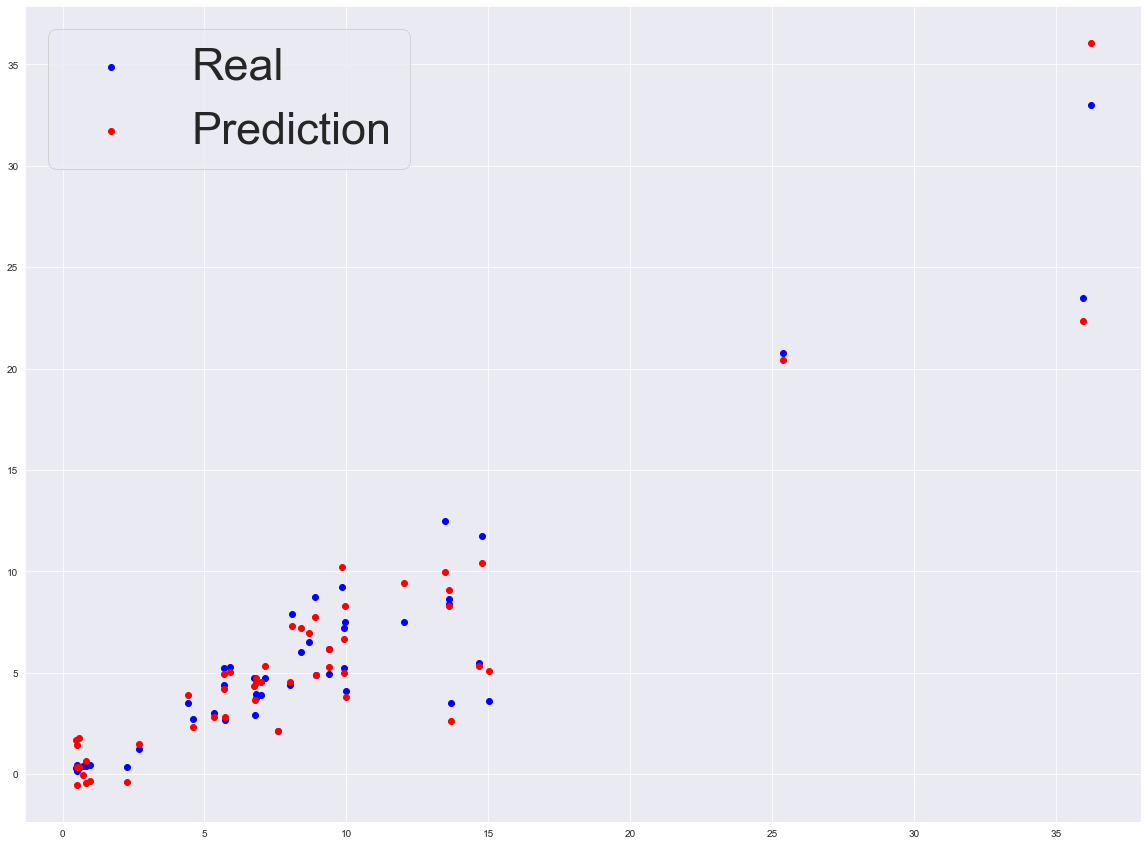

In [66]:
plt.figure(figsize = (20, 15))
plt.scatter(a, b, color = 'blue', label ='Real')
plt.scatter(c, d, color = 'red', label = 'Prediction')
plt.legend(fontsize = 45)

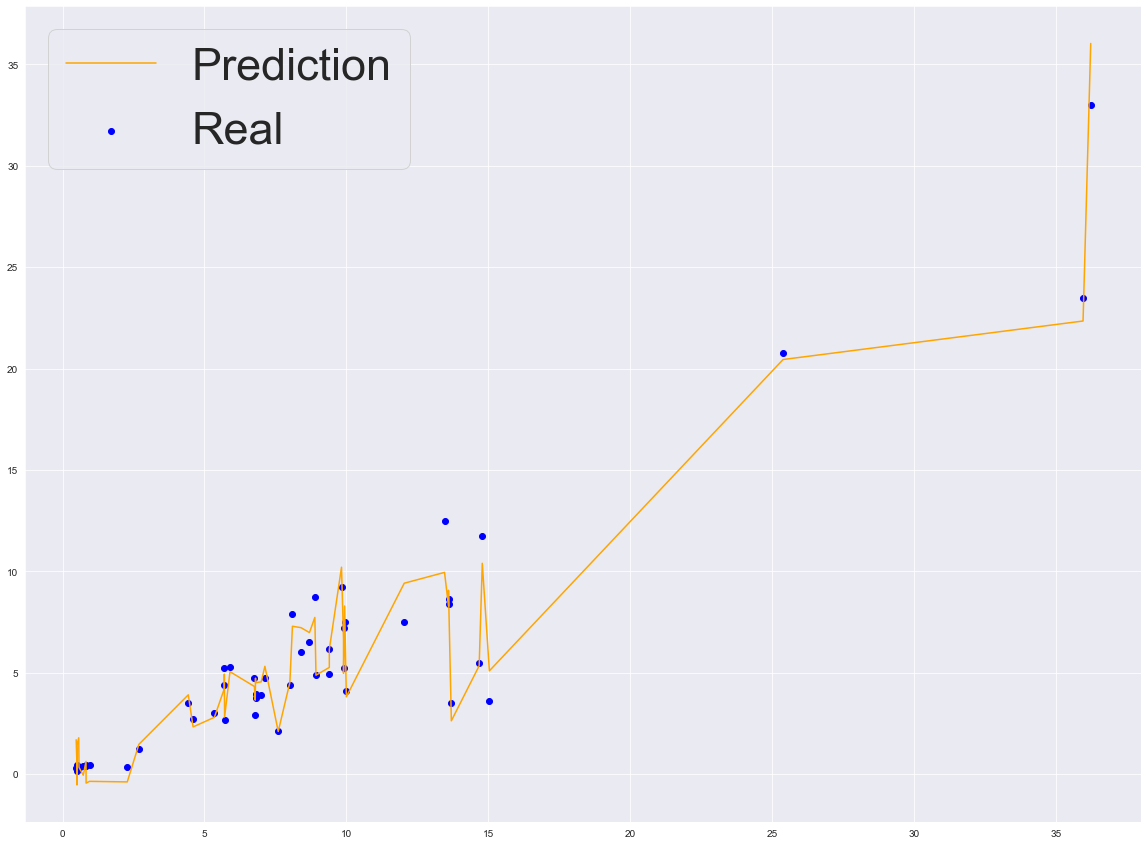

In [68]:
plt.figure(figsize = (20, 15))
plt.scatter(a, b, color = 'blue', label ='Real')
plt.plot(c, d, color = 'orange', label = 'Prediction')
plt.legend(fontsize = 45)

# Finally we could improve model from 91 to 98 which is awesome